In [1]:
import numpy as np
import matplotlib 
import matplotlib as mpl
from astropy.stats import LombScargle
from astropy.stats import sigma_clip
from scipy.signal import savgol_filter
from astropy.io import fits

import halophot
from halophot.halo_tools import halo_tpf
import lightkurve 
from lightkurve import TessTargetPixelFile, TessLightCurveFile, TessLightCurve

print(halophot.__version__)

0.6.6.2


In [2]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=22              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']

Populating the interactive namespace from numpy and matplotlib


In [3]:
fname1 = '../data/tess2018263035959-s0003-0000000024924016-0123-s_tp.fits.gz' #zeta Ceti

In [4]:
tpf1 = lightkurve.open(fname1)

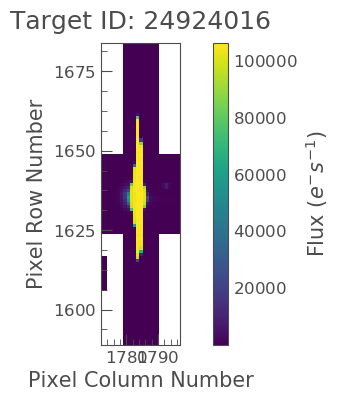

In [5]:
tpf1.plot(frame=0)

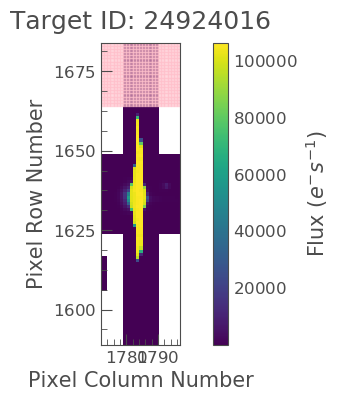

In [6]:
newmask = np.ones((tpf1.flux.shape[1],tpf1.flux.shape[2]),dtype='bool')
xx, yy = np.meshgrid(np.arange(newmask.shape[0]),np.arange(newmask.shape[1]))
newmask[(xx<75).T] = False
tpf1.plot(frame=1,aperture_mask=newmask)

In [7]:
lc = tpf1.to_lightcurve(aperture_mask=newmask)

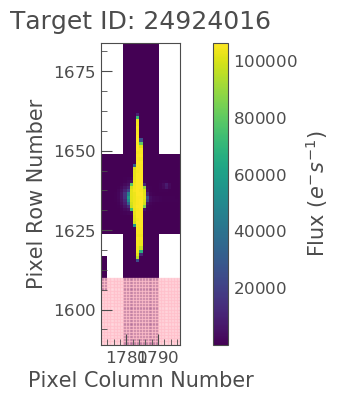

In [8]:
newmask = np.ones((tpf1.flux.shape[1],tpf1.flux.shape[2]),dtype='bool')
xx, yy = np.meshgrid(np.arange(newmask.shape[0]),np.arange(newmask.shape[1]))
newmask[(xx>20).T] = False
tpf1.plot(frame=1,aperture_mask=newmask)

In [9]:
lc2 = tpf1.to_lightcurve(aperture_mask=newmask)

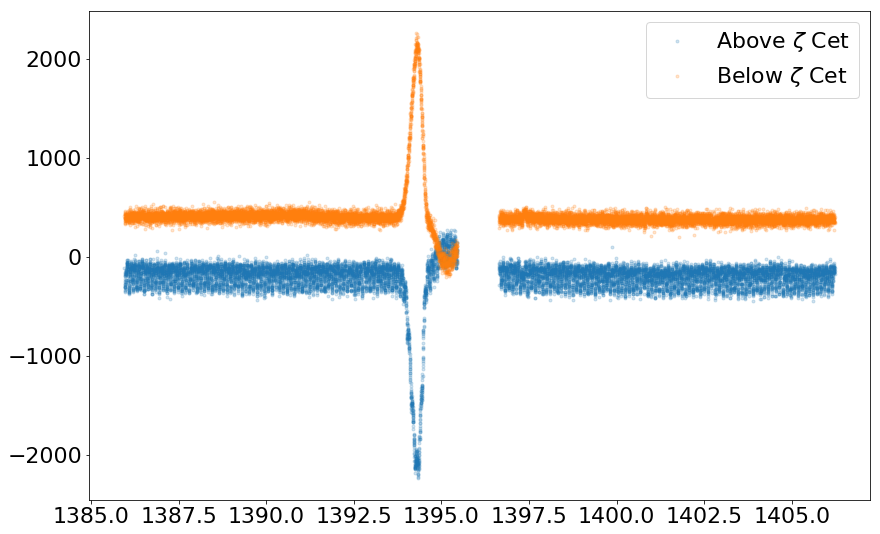

In [10]:
fig = plt.figure(figsize=(14,9))
plt.plot(lc.time, lc.flux,'.',alpha=0.2,label='Above $\\zeta$ Cet')
plt.plot(lc2.time, lc2.flux,'.',alpha=0.2,label='Below $\\zeta$ Cet')
plt.legend()
plt.show()

In [11]:
fname = '../data/tess2018263035959-s0003-0000000419015728-0123-s_tp.fits.gz' #tau Ceti

In [12]:
tpf = lightkurve.open(fname)

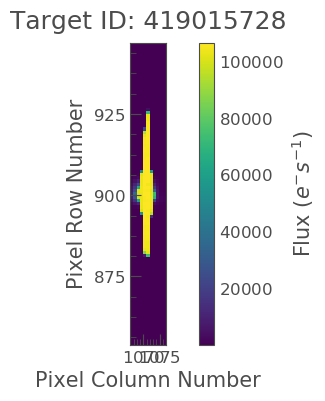

In [13]:
tpf.plot(frame=0)

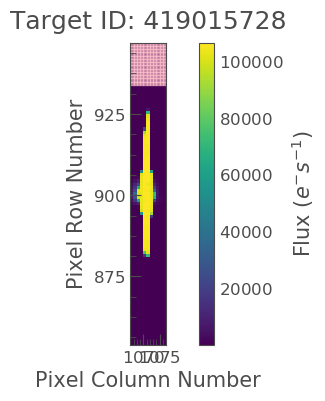

In [14]:
newmask = np.ones((tpf.flux.shape[1],tpf.flux.shape[2]),dtype='bool')
xx, yy = np.meshgrid(np.arange(newmask.shape[0]),np.arange(newmask.shape[1]))
newmask[(xx<80).T] = False
tpf.plot(frame=1,aperture_mask=newmask)

In [15]:
lc3 = tpf.to_lightcurve(aperture_mask=newmask)

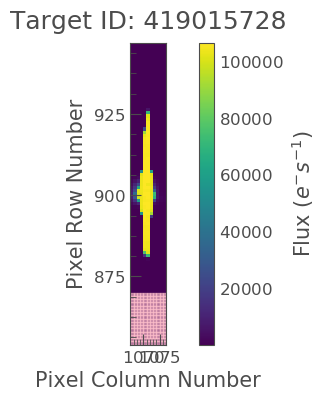

In [16]:
newmask = np.ones((tpf.flux.shape[1],tpf.flux.shape[2]),dtype='bool')
xx, yy = np.meshgrid(np.arange(newmask.shape[0]),np.arange(newmask.shape[1]))
newmask[(xx>15).T] = False
tpf.plot(frame=1,aperture_mask=newmask)

In [17]:
lc4 = tpf.to_lightcurve(aperture_mask=newmask)

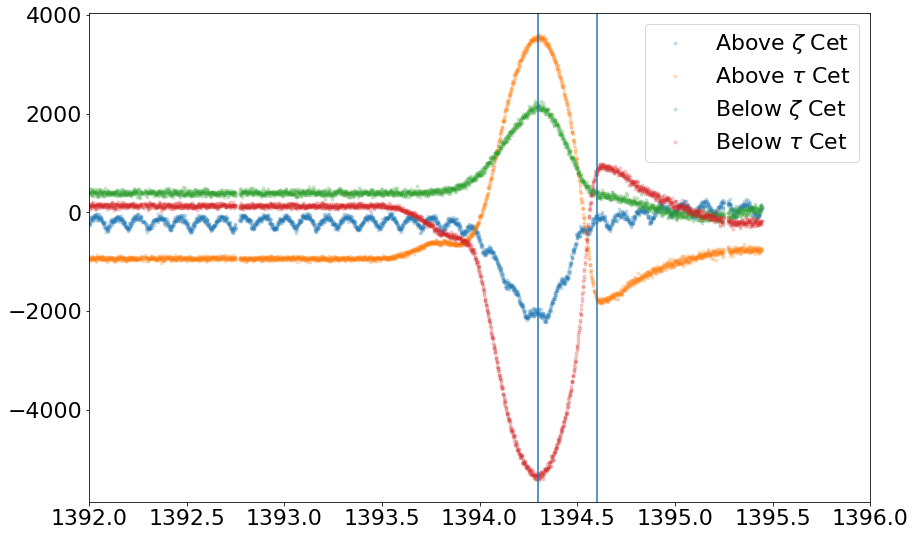

In [35]:
fig = plt.figure(figsize=(14,9))
plt.plot(lc.time, lc.flux,'.',alpha=0.2,label='Above $\\zeta$ Cet')
plt.plot(lc3.time, lc3.flux,'.',alpha=0.2,label='Above $\\tau$ Cet')
plt.plot(lc2.time, lc2.flux,'.',alpha=0.2,label='Below $\\zeta$ Cet')
plt.plot(lc4.time, lc4.flux,'.',alpha=0.2,label='Below $\\tau$ Cet')
plt.legend()
plt.xlim(1392.,1396.)
plt.axvline(1394.3)
plt.axvline(1394.6)
plt.show()

In [19]:
background_tau = tpf.get_bkg_lightcurve()
background_zet = tpf1.get_bkg_lightcurve()

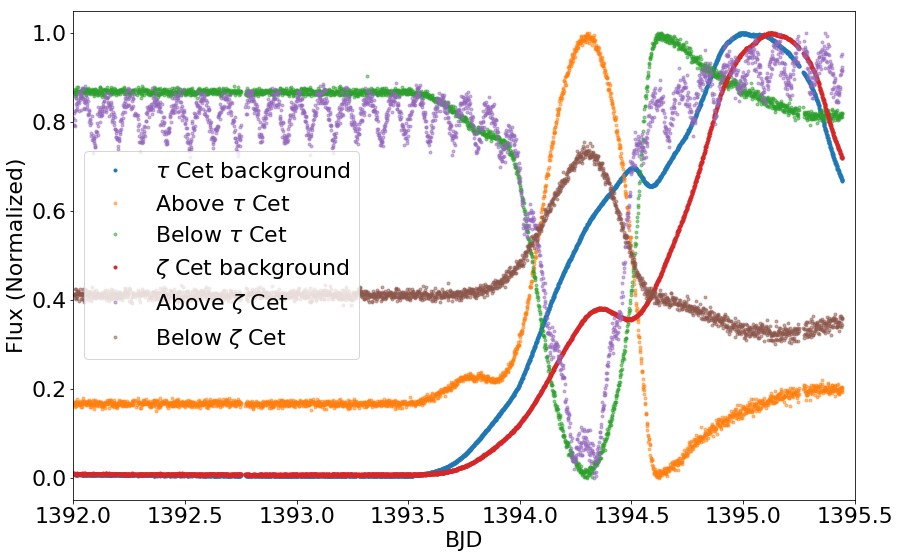

In [48]:
fig = plt.figure(figsize=(14,9))
plt.plot(background_tau.time,(background_tau.flux-np.nanmin(background_tau.flux))/np.nanmax(background_tau.flux-np.nanmin(background_tau.flux)),'.',label='$\\tau$ Cet background')
plt.plot(lc3.time, (lc3.flux-np.nanmin(lc3.flux))/np.nanmax(lc3.flux-np.nanmin(lc3.flux)),'.',alpha=0.5,label='Above $\\tau$ Cet')
plt.plot(lc4.time, (lc4.flux-np.nanmin(lc4.flux))/np.nanmax(lc4.flux-np.nanmin(lc4.flux)),'.',alpha=0.5,label='Below $\\tau$ Cet')

plt.plot(background_zet.time,(background_zet.flux-np.nanmin(background_zet.flux))/np.nanmax(background_zet.flux-np.nanmin(background_zet.flux)),'.',label='$\\zeta$ Cet background')
plt.plot(lc.time, (lc.flux-np.nanmin(lc.flux))/np.nanmax(lc.flux-np.nanmin(lc.flux)),'.',alpha=0.5,label='Above $\\zeta$ Cet')
plt.plot(lc2.time, (lc2.flux-np.nanmin(lc3.flux))/np.nanmax(lc3.flux-np.nanmin(lc3.flux)),'.',alpha=0.5,label='Below $\\zeta$ Cet')
# plt.axvline(1394.3)
# plt.axvline(1394.6)
plt.xlim(1392,1395.5)
plt.xlabel('BJD')
plt.ylabel('Flux (Normalized)')
plt.legend()
plt.show()

In [55]:
fname = '../data/tess-s0003-1-2_26.01677_-15.93727_100x100_astrocut.fits.gz' #tau Ceti

In [56]:
tpf2 = lightkurve.open(fname)

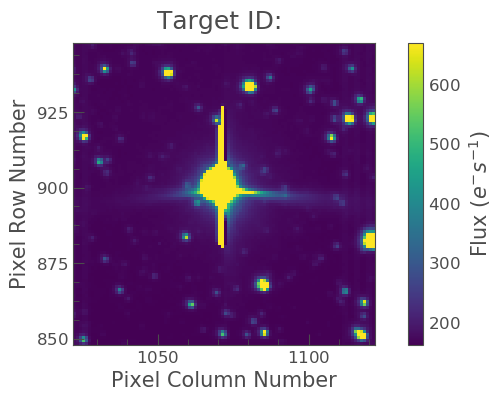

In [57]:
tpf2.plot()

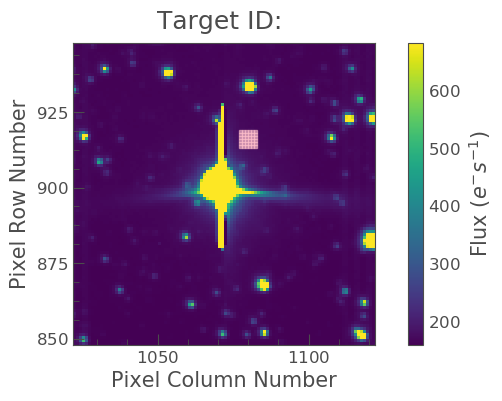

In [60]:
newmask = np.ones((tpf2.flux.shape[1],tpf2.flux.shape[2]),dtype='bool')
xx, yy = np.meshgrid(np.arange(newmask.shape[0]),np.arange(newmask.shape[1]))
newmask[(xx>70).T] = False
newmask[(xx<65).T] = False
newmask[(yy>60).T] = False
newmask[(yy<55).T] = False
tpf2.plot(frame=1,aperture_mask=newmask)

In [61]:
lc5 = tpf2.to_lightcurve(aperture_mask=newmask)

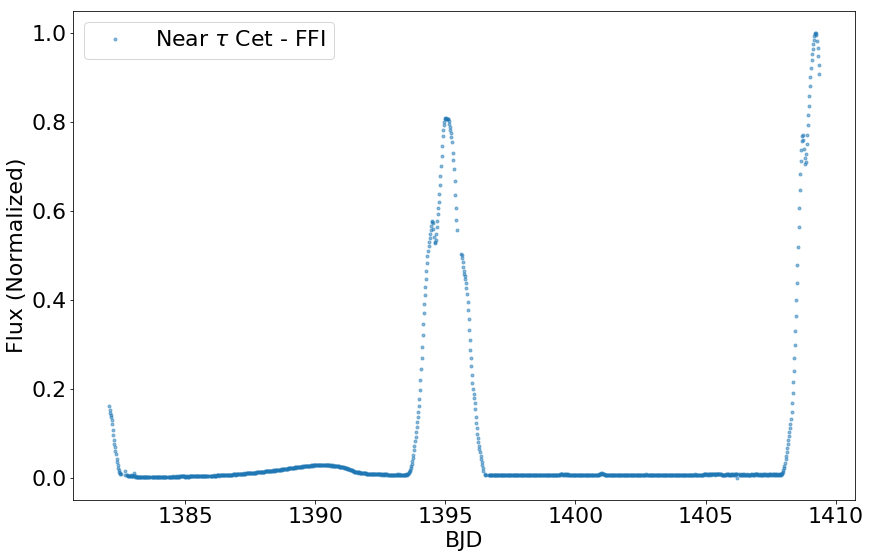

In [70]:
fig = plt.figure(figsize=(14,9))
m = lc5.flux < 2e4
bkgd_time = lc5.time[m]
norm_bkgd_flux = (lc5.flux[m]-np.nanmin(lc5.flux[m]))/np.nanmax(lc5.flux[m]-np.nanmin(lc5.flux[m]))
plt.plot(bkgd_time, norm_bkgd_flux ,'.',alpha=0.5,label='Near $\\tau$ Cet - FFI')

plt.legend()
plt.xlabel('BJD')
plt.ylabel('Flux (Normalized)')
plt.show()

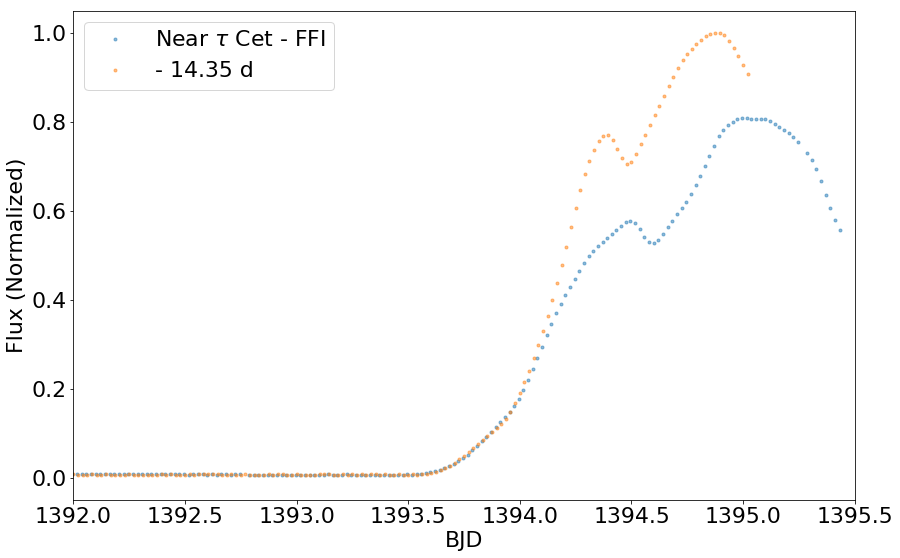

In [85]:
fig = plt.figure(figsize=(14,9))
plt.plot(bkgd_time, norm_bkgd_flux ,'.',alpha=0.5,label='Near $\\tau$ Cet - FFI')
plt.plot(bkgd_time - 14.35, norm_bkgd_flux ,'.',alpha=0.5,label='- 14.35 d')
plt.xlim(1392,1395.5)
plt.xlabel('BJD')
plt.ylabel('Flux (Normalized)')
plt.legend()
plt.show()